## KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [2]:
my_data= load_iris()

In [3]:
my_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(my_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
features= pd.DataFrame(my_data.data,columns=my_data.feature_names)

In [6]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
target= pd.DataFrame(my_data.target,columns=['target'])
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [9]:
target.value_counts()

target
0         50
1         50
2         50
Name: count, dtype: int64

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [11]:
knn= KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred= knn.predict(x_test)

In [14]:
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1])

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [17]:
y_test.value_counts()

target
0         14
2         14
1         10
Name: count, dtype: int64

In [18]:
pd.DataFrame(y_pred).value_counts()

0    14
2    13
1    11
Name: count, dtype: int64

In [19]:
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [20]:
grid_search= GridSearchCV(knn,params)

In [21]:
grid_search.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [22]:
grid_search.best_params_

{'n_neighbors': 3}

## Logistic_Regressiion

In [23]:
df1= pd.read_csv('Admission.csv')

In [24]:
df1.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [25]:
target=df1[['ADMIT']]
features=df1.drop('ADMIT',axis=1)

In [26]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 3)
(100, 3)
(300, 1)
(100, 1)


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model= LogisticRegression()

In [30]:
log_model.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
y_pred= log_model.predict(x_test)

In [32]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [33]:
df1.ADMIT.value_counts()

ADMIT
0    273
1    127
Name: count, dtype: int64

In [34]:
log_model.predict_proba(x_test)

array([[0.68252193, 0.31747807],
       [0.87744779, 0.12255221],
       [0.48256058, 0.51743942],
       [0.86679746, 0.13320254],
       [0.93027558, 0.06972442],
       [0.69139854, 0.30860146],
       [0.61164889, 0.38835111],
       [0.82789895, 0.17210105],
       [0.78305594, 0.21694406],
       [0.73953192, 0.26046808],
       [0.88266987, 0.11733013],
       [0.58036674, 0.41963326],
       [0.84853288, 0.15146712],
       [0.73136097, 0.26863903],
       [0.62976917, 0.37023083],
       [0.86314428, 0.13685572],
       [0.58562528, 0.41437472],
       [0.88252094, 0.11747906],
       [0.82980417, 0.17019583],
       [0.83263704, 0.16736296],
       [0.87632849, 0.12367151],
       [0.70645687, 0.29354313],
       [0.60348332, 0.39651668],
       [0.52062454, 0.47937546],
       [0.53629978, 0.46370022],
       [0.77364866, 0.22635134],
       [0.74850836, 0.25149164],
       [0.71602515, 0.28397485],
       [0.81709857, 0.18290143],
       [0.84547159, 0.15452841],
       [0.

In [35]:
log_model.coef_

array([[ 0.00328986,  0.74809476, -0.59748804]])

In [36]:
log_model.intercept_

array([-3.9330948])

In [37]:
accuracy_score(y_test,y_pred)

0.63

In [38]:
import seaborn as sns

<Axes: xlabel='GPA'>

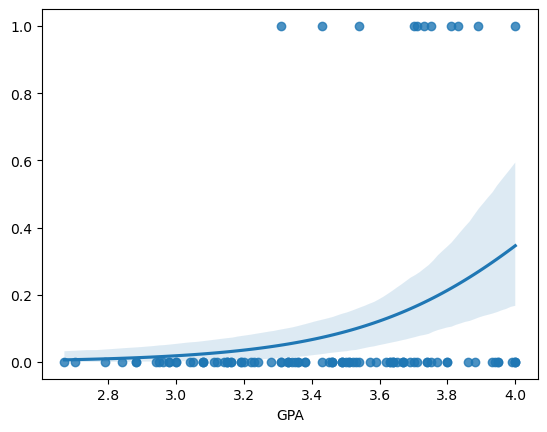

In [39]:
sns.regplot(data=df1, x=x_test.iloc[:,1],y=y_pred,logistic=True)